# Bakery Product classification
| Product Type and Storage Condition classification |


In [1]:
import numpy as np  
import pandas as pd  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.neural_network import MLPClassifier  
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  
from sklearn.decomposition import PCA

| **Load Data** |

In [2]:
all_data = pd.read_csv('./datasets/my_dataset.csv')

In [3]:
all_data

,Replica,Product_Type,storage_1,storage_2,storage_3,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_196,Feature_197,Feature_198,Feature_199,Feature_200,Feature_201,Feature_202,storage_1.1,storage_2.1,storage_3.1
0,A_1_1.s1p,0,True,False,False,0.998911,0.997938,0.998448,0.997675,0.997512,...,-0.086132,-0.089697,-0.086160,-0.087830,-0.090189,-0.093536,-0.099144,True,False,False
1,A_1_10.s1p,0,True,False,False,0.990407,0.990209,0.990899,0.990620,0.990649,...,-0.107149,-0.107162,-0.103144,-0.104506,-0.108075,-0.107332,-0.107138,True,False,False
2,A_1_2.s1p,0,True,False,False,1.000622,1.000334,1.000036,0.999719,1.000042,...,-0.074409,-0.077034,-0.075652,-0.075483,-0.078721,-0.082438,-0.081684,True,False,False
3,A_1_3.s1p,0,True,False,False,0.979912,0.979217,0.977894,0.978873,0.978671,...,-0.153481,-0.157953,-0.155468,-0.156709,-0.159912,-0.161316,-0.163065,True,False,False
4,A_1_4.s1p,0,True,False,False,0.986771,0.986445,0.985690,0.986096,0.986031,...,-0.126289,-0.129071,-0.130324,-0.128762,-0.130648,-0.136111,-0.138368,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,B_3_5.s1p,1,False,False,True,0.998506,0.996153,0.995807,0.996768,0.996991,...,-0.080615,-0.081420,-0.080132,-0.081796,-0.086156,-0.084462,-0.083454,False,False,True
176,B_3_6.s1p,1,False,False,True,0.994566,0.994765,0.998400,0.995198,0.996602,...,-0.086547,-0.087001,-0.086317,-0.087683,-0.087976,-0.090850,-0.088978,False,False,True
177,B_3_7.s1p,1,False,False,True,0.997449,0.997051,0.994459,0.995683,0.997524,...,-0.085176,-0.086364,-0.084368,-0.086216,-0.085461,-0.088747,-0.086335,False,False,True
178,B_3_8.s1p,1,False,False,True,0.994907,0.996552,0.992721,0.997221,0.996837,...,-0.083673,-0.084627,-0.084248,-0.084651,-0.086146,-0.088117,-0.084142,False,False,True


In [4]:
all_data.keys()

Index(['Replica', 'Product_Type', 'storage_1', 'storage_2', 'storage_3',
       'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       ...
       'Feature_196', 'Feature_197', 'Feature_198', 'Feature_199',
       'Feature_200', 'Feature_201', 'Feature_202', 'storage_1.1',
       'storage_2.1', 'storage_3.1'],
      dtype='object', length=207)

In [5]:
print(all_data['Product_Type'])

0      0
1      0
2      0
3      0
4      0
      ..
175    1
176    1
177    1
178    1
179    1
Name: Product_Type, Length: 180, dtype: int64


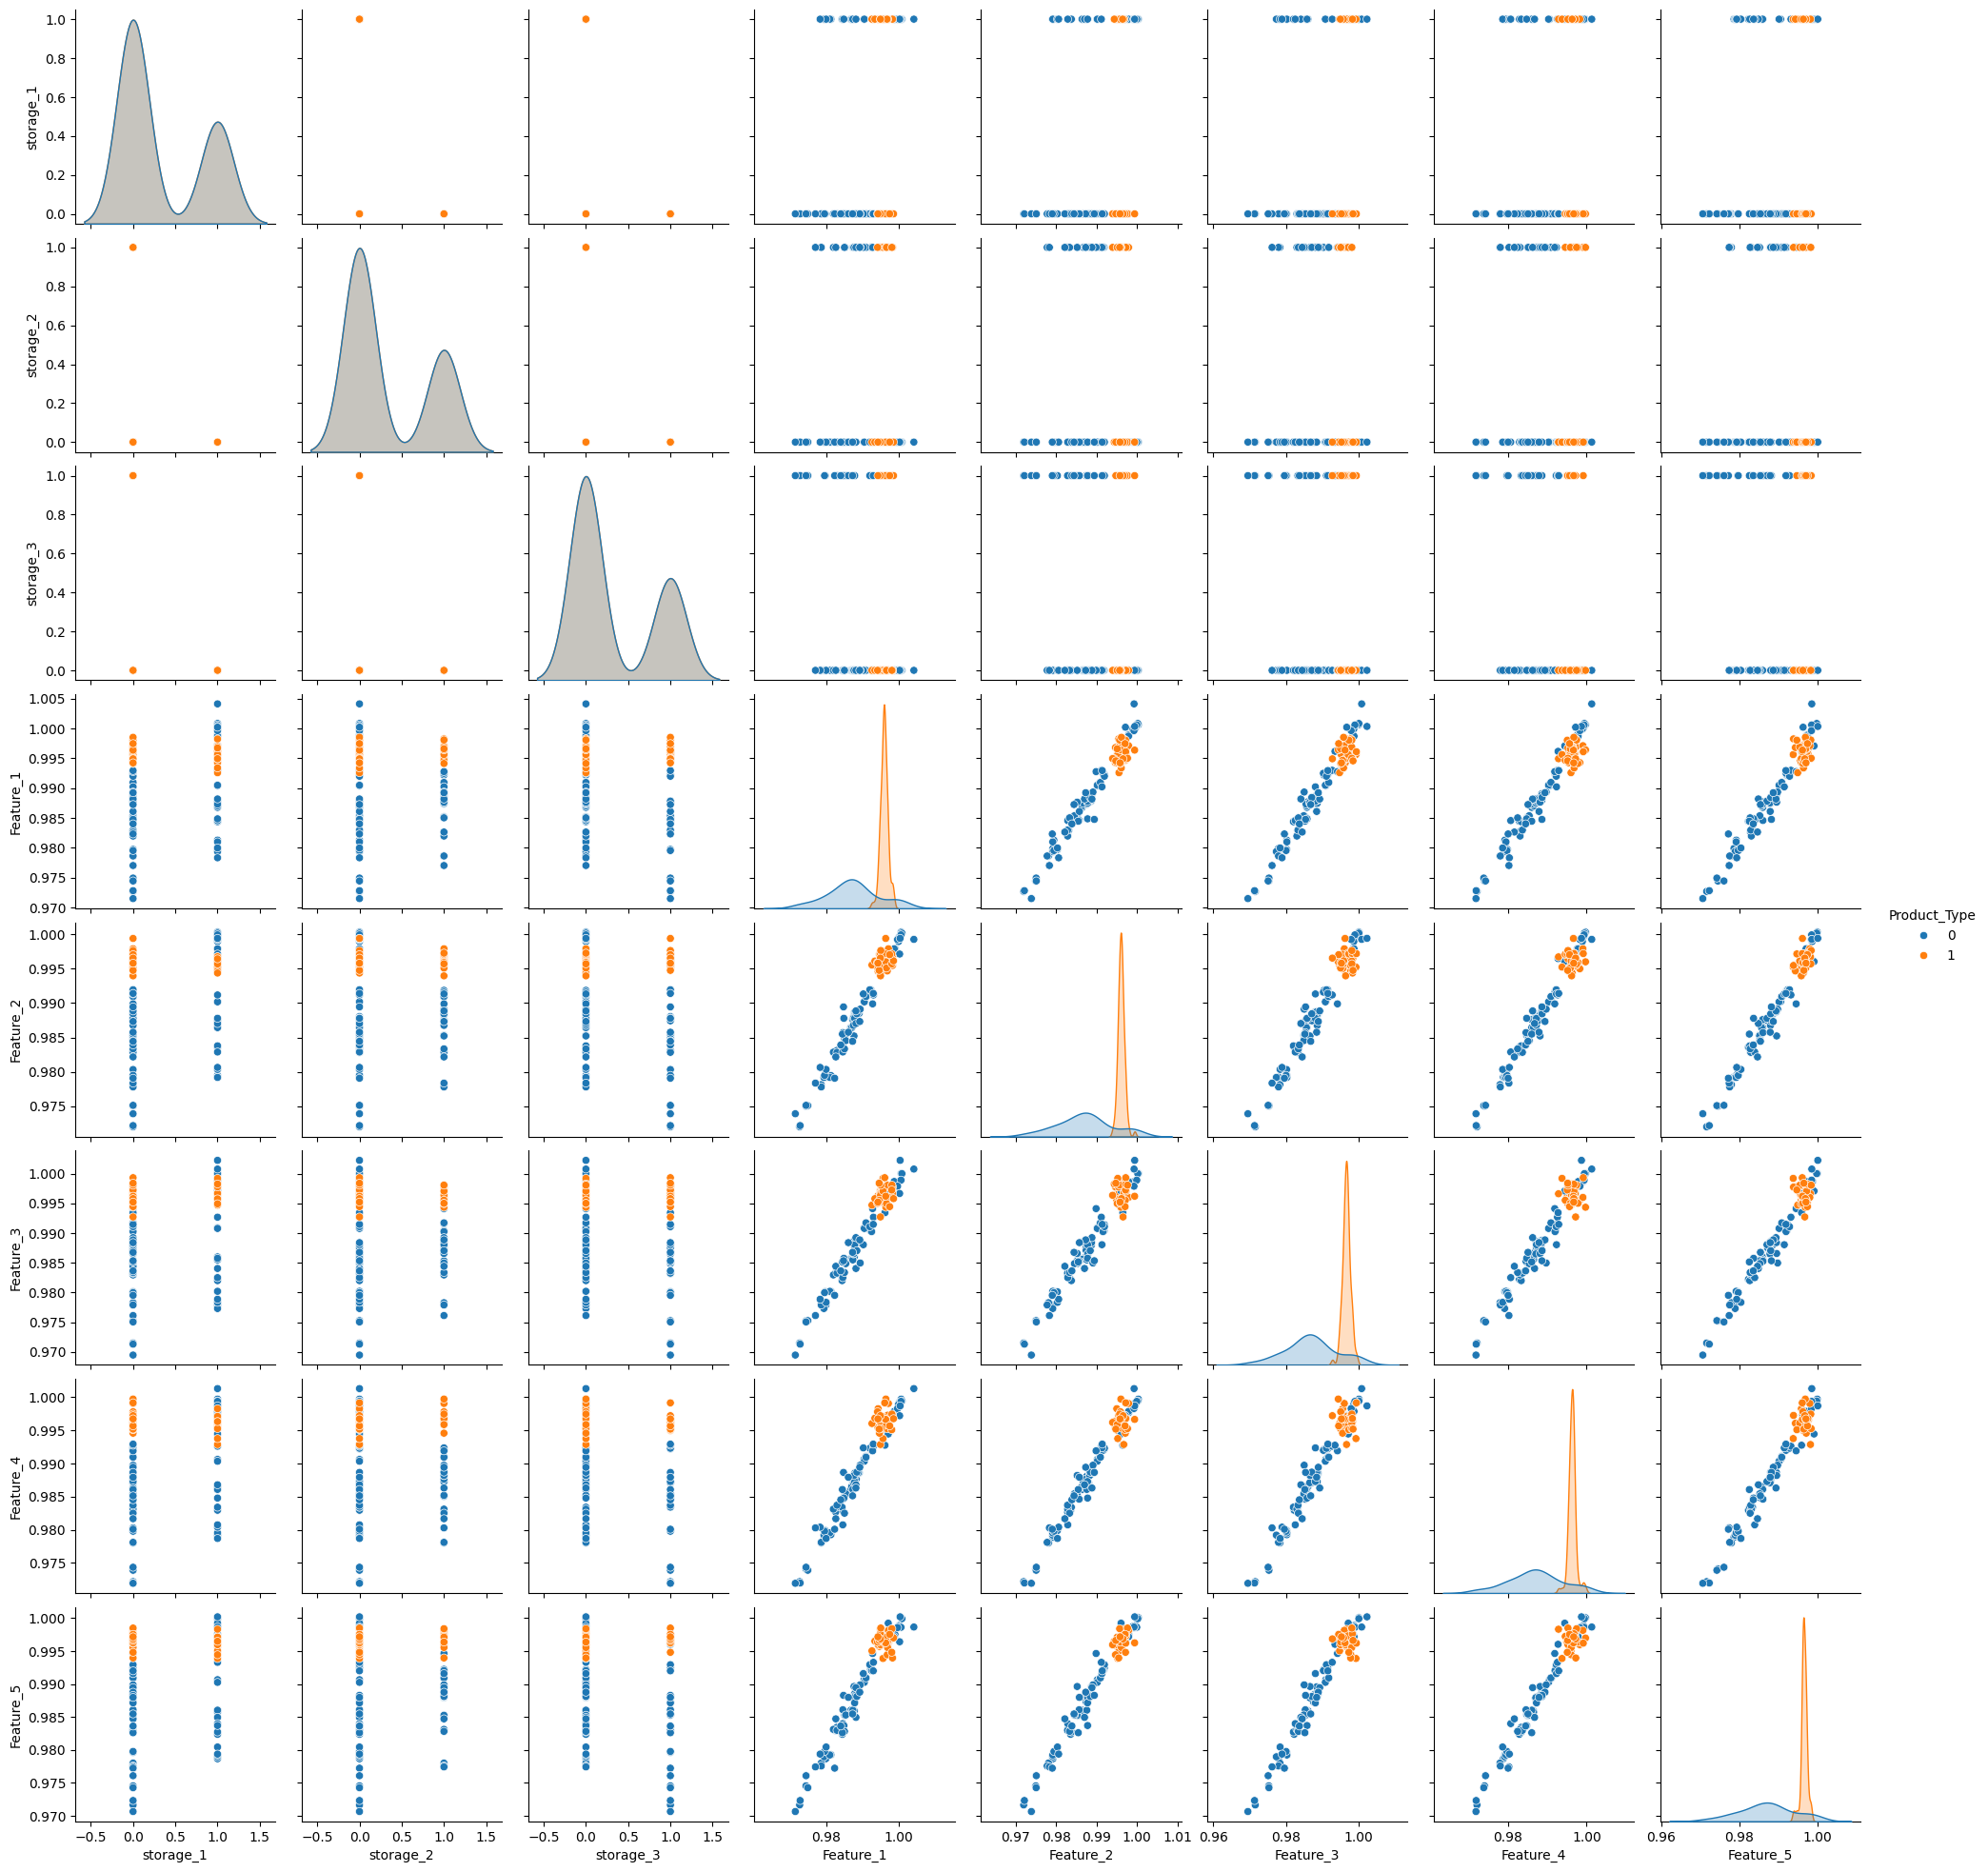

In [6]:
sns.pairplot(all_data ,hue ='Product_Type', vars =['storage_1', 'storage_2', 'storage_3',
       'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']) 

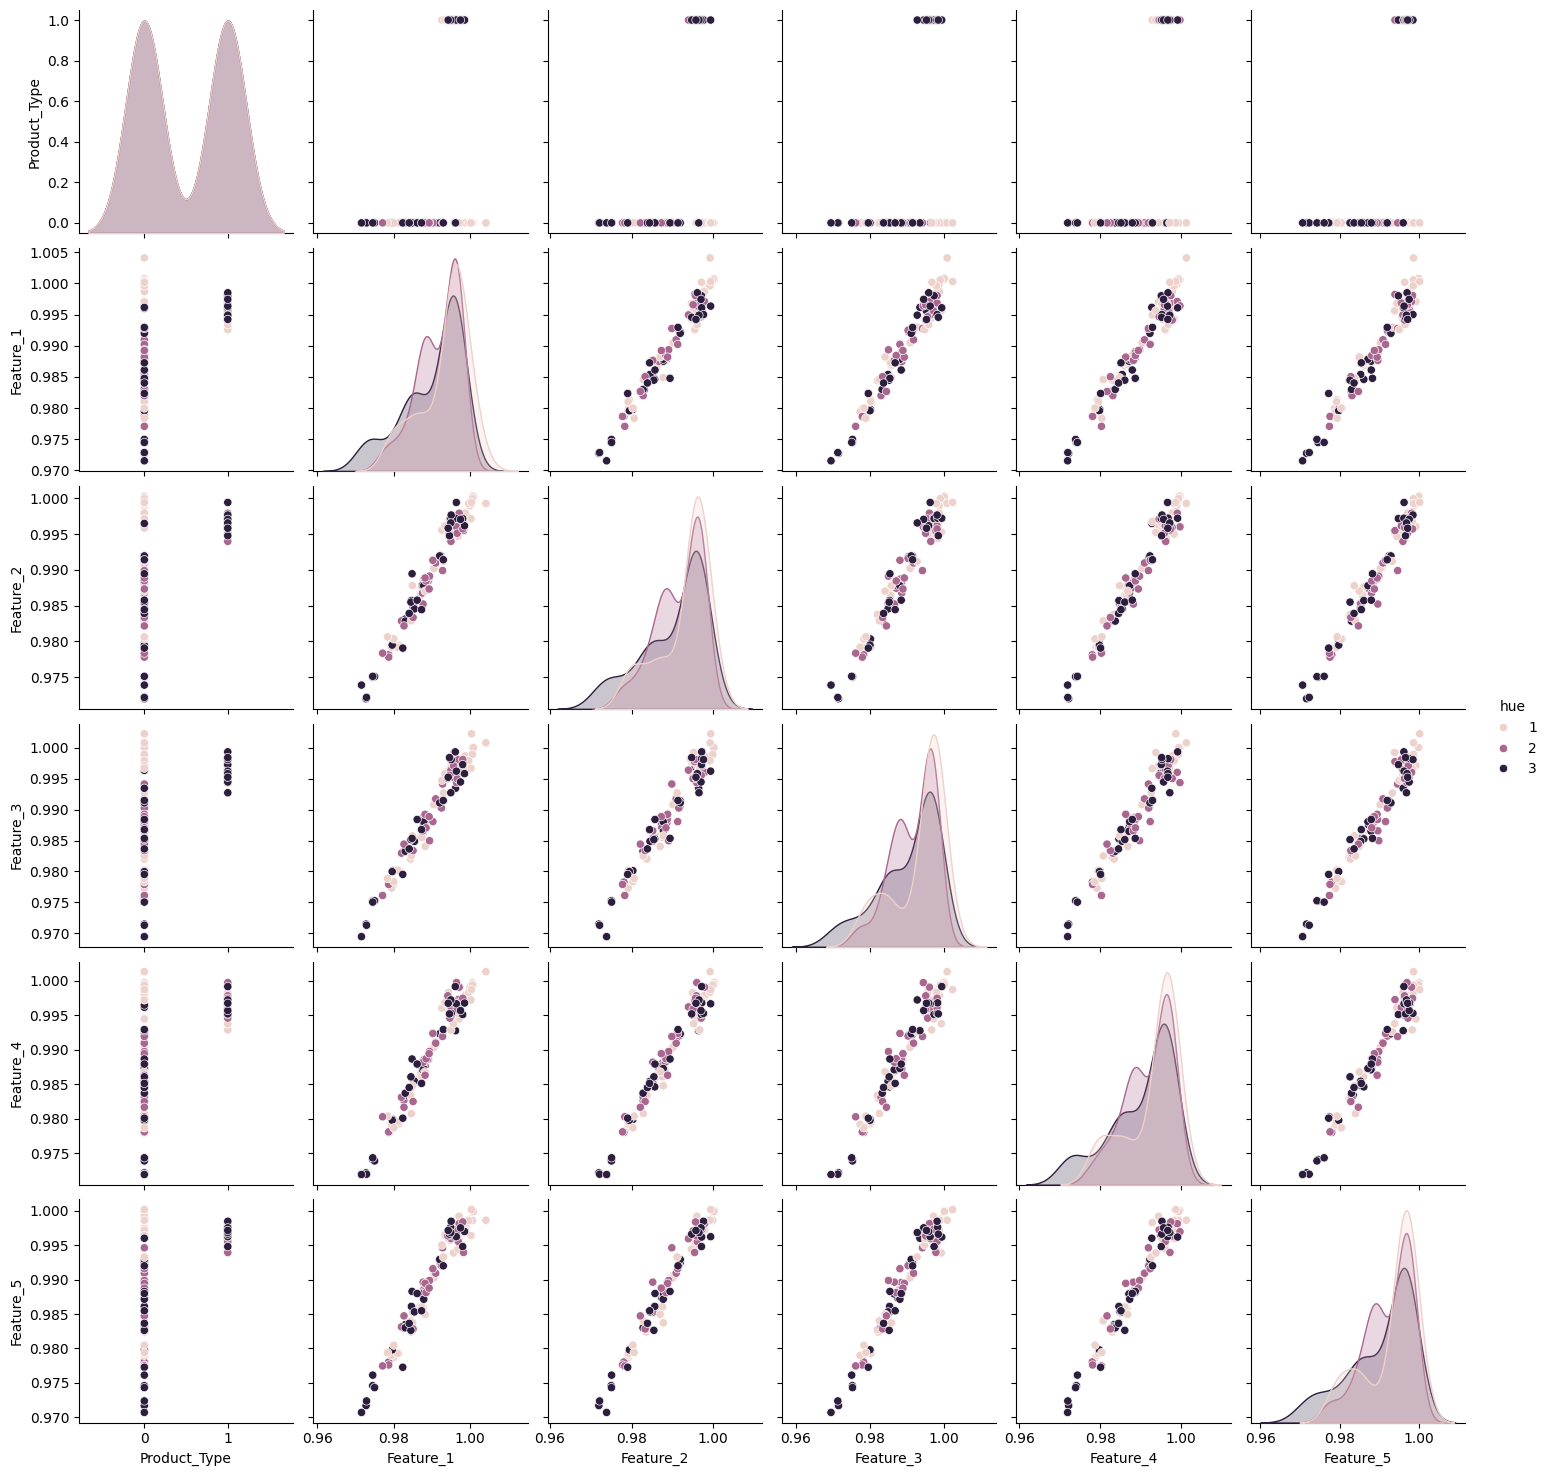

In [7]:
# Create a new column in all_data for the hue
all_data['hue'] = all_data[['storage_1', 'storage_2', 'storage_3']].idxmax(axis=1).str[-1].astype(int)

# Pass the column name to hue
sns.pairplot(all_data, hue='hue', vars=['Product_Type', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])

<Axes: xlabel='Product_Type', ylabel='count'>

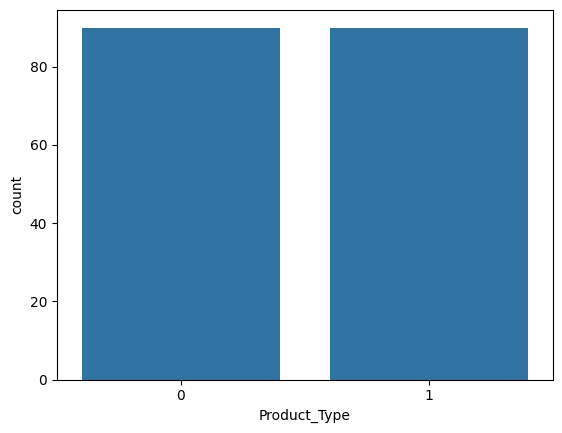

In [8]:
sns.countplot(x='Product_Type', data=all_data)


<Axes: xlabel='storage_condition', ylabel='count'>

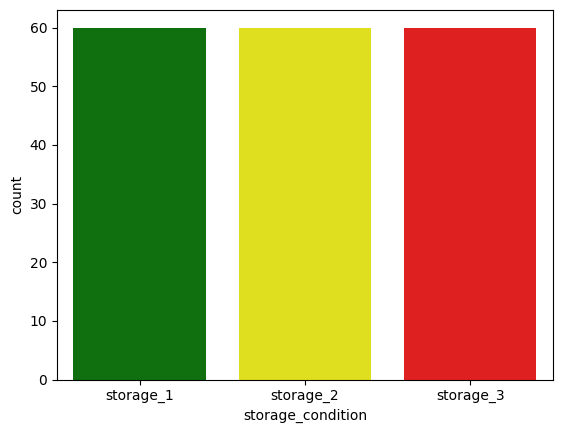

In [9]:
# Define the custom color palette for storage conditions
custom_palette = {'storage_1': 'green', 'storage_2': 'yellow', 'storage_3': 'red'}

# Determine the condition with the maximum storage value for each row
all_data['storage_condition'] = all_data[['storage_1', 'storage_2', 'storage_3']].idxmax(axis=1)

# Create the count plot with the custom palette and hue set to 'storage_condition'
sns.countplot(x='storage_condition', data=all_data, hue='storage_condition', palette=custom_palette, legend=False)

# MOdel Definitions

For this task we are using 5 differet ML algorithims
KNN
RF
SVM
LR
MLP

In [3]:

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):  
    """Plots the confusion matrix."""  
    cm = confusion_matrix(y_true, y_pred)  
    plt.figure(figsize=(8, 6))  
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  
    plt.xlabel('Predicted')  
    plt.ylabel('Actual')  
    plt.title(title)  
    plt.show()  

def classify_model(model, features, target, model_name, pca_components=None, lda_components=False, return_accuracy=False):
    """
    Performs classification with the given model, with optional LDA and PCA for dimensionality reduction.
    
    Args:
        model: Machine learning model.
        features (array-like): Feature matrix.
        target (array-like): Target labels.
        model_name (str): Name of the model for identification.
        pca_components (int, optional): Number of PCA components. If None, PCA is not applied.
        lda_components (bool or int, optional): If True, LDA is applied with n_components=num_classes-1.
        return_accuracy (bool, optional): Whether to return mean accuracy.
        
    Returns:
        float (optional): Mean accuracy if return_accuracy is True.
    """
    num_classes = len(np.unique(target))
    
    # Initialize pipeline steps
    pipeline_steps = [
        ('scaler', StandardScaler())  # Standardize the data
    ]
    
    # Apply LDA if specified
    if lda_components:
        pipeline_steps.append(('lda', LDA(n_components=num_classes - 1)))
    
    # Apply PCA if specified
    if pca_components:
        pipeline_steps.append(('pca', PCA(n_components=pca_components)))
    
    # Add the model to the pipeline
    pipeline_steps.append((model_name, model))
    
    # Create the pipeline
    pipeline = Pipeline(pipeline_steps)
    
    # Perform cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, features, target, cv=cv, scoring='accuracy', n_jobs=-1)
    
    print(f"\n{model_name.upper()} Classification Results "
          f"(LDA Components: {lda_components if lda_components else 'None'}, "
          f"PCA Components: {pca_components if pca_components else 'None'}):")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", cv_scores.mean())

    # Predict using cross-validation
    y_pred = cross_val_predict(pipeline, features, target, cv=cv, n_jobs=-1)
    plot_confusion_matrix(target, y_pred, title=f"{model_name.upper()} Confusion Matrix")
    print(classification_report(target, y_pred))
    
    if return_accuracy:
        return cv_scores.mean()  # Return the mean accuracy if requested

def knn(features, target, params, pca_components=None, lda_components=False, return_accuracy=False):
    model = KNeighborsClassifier(**params)
    return classify_model(model, features, target, 'knn', pca_components=pca_components, lda_components=lda_components, return_accuracy=return_accuracy)

def svm(features, target, params, pca_components=None, lda_components=False, return_accuracy=False):
    model = SVC(**params)
    return classify_model(model, features, target, 'svm', pca_components=pca_components, lda_components=lda_components, return_accuracy=return_accuracy)

def rf(features, target, params, pca_components=None, lda_components=False, return_accuracy=False):
    """Random Forest Classifier."""  
    model = RandomForestClassifier(**params) 
    return classify_model(model, features, target, 'rf', pca_components=pca_components, lda_components=lda_components, return_accuracy=return_accuracy)

def lr(features, target, params, pca_components=None, lda_components=False, return_accuracy=False):
    """Logistic Regression Classifier."""  
    model = LogisticRegression(**params)  
    return classify_model(model, features, target, 'lr', pca_components=pca_components, lda_components=lda_components, return_accuracy=return_accuracy)

def mlp(features, target, params, pca_components=None, lda_components=False, return_accuracy=False):
    """Multi-Layer Perceptron Classifier."""  
    model = MLPClassifier(**params)  
    return classify_model(model, features, target, 'mlp', pca_components=pca_components, lda_components=lda_components, return_accuracy=return_accuracy)



In [4]:
import os
import json

# Define the results directory path
results_dir = './results'

# Create results directory if it doesn't exist
os.makedirs(results_dir, exist_ok=True)

# Function to save results to a JSON file
def save_results_to_file(results, filename):
    """Save classification results to a JSON file in the results directory."""
    file_path = os.path.join(results_dir, filename)
    with open(file_path, 'w') as file:
        json.dump(results, file, indent=4)
    print(f"Results saved to {file_path}")


In [5]:
# Initialize a dictionary to hold accuracy results  
#results_with_storage = {}  
#results_without_storage = {}  

# Function to perform classification with or without dimensionality reduction
def classify_with_dimensionality_reduction(features, target, best_params, pca_components=None, lda_components=False):
    """Classify with dimensionality reduction (either PCA or LDA)."""
    results = {}
    print(f'Product Type classification with parameters considering dimensionality reduction (PCA: {pca_components}, LDA: {lda_components})')

    # Collect accuracy results for each model with or without storage conditions
    results['KNN'] = knn(features, target, best_params['KNN'], pca_components=pca_components, lda_components=lda_components, return_accuracy=True)  
    results['SVM'] = svm(features, target, best_params['SVM'], pca_components=pca_components, lda_components=lda_components, return_accuracy=True)  
    results['Random Forest'] = rf(features, target, best_params['Random Forest'], pca_components=pca_components, lda_components=lda_components, return_accuracy=True)  
    results['Logistic Regression'] = lr(features, target, best_params['Logistic Regression'], pca_components=pca_components, lda_components=lda_components, return_accuracy=True)  
    results['MLP'] = mlp(features, target, best_params['MLP'], pca_components=pca_components, lda_components=lda_components, return_accuracy=True)
    return results

# __Visualization of Classification Accuracies__

In [6]:

#Visualization of Classification Accuracies  
def plot_accuracy_comparisons(results_without_storage, results_with_storage):  
    """Plot accuracy comparisons for models with and without Product Types."""  
    models = list(results_without_storage.keys())  
    accuracies_without = list(results_without_storage.values())  
    accuracies_with = list(results_with_storage.values())  
    
    x = np.arange(len(models))  # the label locations  
    width = 0.35  # the width of the bars  

    fig, ax = plt.subplots(figsize=(10, 6))  
    bars1 = ax.bar(x - width/2, accuracies_without, width, label='Without Product_Type')  
    bars2 = ax.bar(x + width/2, accuracies_with, width, label='With Product_Type')  

    # Add some text for labels, title and custom x-axis tick labels, etc.  
    ax.set_ylabel('Accuracy')  
    ax.set_title('Model Accuracies')  
    ax.set_xticks(x)  
    ax.set_xticklabels(models)  
    ax.legend()  

    # Autolabel function to display accuracy on top of bars  
    def autolabel(bars):  
        """Attach a text label above each bar in *bars*, displaying its height."""  
        for bar in bars:  
            height = bar.get_height()  
            ax.annotate(f'{height:.2f}',  
                        xy=(bar.get_x() + bar.get_width() / 2, height),  
                        xytext=(0, 3),  # 3 points vertical offset  
                        textcoords="offset points",  
                        ha='center', va='bottom')  

    autolabel(bars1)  
    autolabel(bars2)  

    plt.ylim(0, 1)  # Set y-axis limit (0 to 1 for accuracy)  
    plt.show()  


# Storage Condition Classification without applying dimensionaliy reduction

| **Storage Condition Classification without considering the Product Type** |


In [7]:
# Prepare Data  
target_sc = all_data[['storage_1', 'storage_2', 'storage_3']].idxmax(axis=1).str[-1].astype(int)
features_sc = all_data.iloc[:, 5:] 
features_sc_pt = all_data.drop(columns=['Replica', 'storage_1', 'storage_2', 'storage_3'])

In [15]:
# Define best parameters for classification without storage conditions  
'''best_params_without_product = {  
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  
    'Random Forest': {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None},  
    'SVM': {'C': 37.454637344617396, 'kernel': 'linear'},  
    'Logistic Regression': {'C': 37.454637344617396, 'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'tanh', 'alpha': 0.03056137691733707, 'hidden_layer_sizes': (100,100), 'max_iter': 1000}  
}'''

"best_params_without_product = {  \n    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  \n    'Random Forest': {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None},  \n    'SVM': {'C': 37.454637344617396, 'kernel': 'linear'},  \n    'Logistic Regression': {'C': 37.454637344617396, 'solver': 'lbfgs', 'max_iter': 1000},  \n    'MLP': {'activation': 'tanh', 'alpha': 0.03056137691733707, 'hidden_layer_sizes': (100,100), 'max_iter': 1000}  \n}"

In [8]:
'''best_params_without_product = {  
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  
    'Random Forest': {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20},  
    'SVM': {'C': 617.4825096277165, 'gamma': 'auto', 'kernel': 'rbf'},  
    'Logistic Regression': {'C': 212.34011067827615, 'l1_ratio': 0.18182496720710062, 'penalty': 'l2', 'solver': 'lbfgs'},  
    'MLP': {'activation': 'relu', 'alpha': 0.06925360328902704, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0033861517140362798, 'max_iter': 2000}
    
}

best_params_without_product = {  
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  # Best CV Accuracy = 0.9722
    'Random Forest': {'n_estimators': 281, 'min_samples_split': 2, 'max_depth': 30},  # Best CV Accuracy = 0.9667
    'SVM': {'C': 70.80754970702675, 'kernel': 'rbf'},  # Best CV Accuracy = 0.9556
    'Logistic Regression': {'C': 37.454637344617396, 'solver': 'lbfgs'},  # Best CV Accuracy = 0.9556
    'MLP': {'activation': 'relu', 'alpha': 0.0066051592985279526, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}  # Best CV Accuracy = 0.9889
}
'''

best_params_without_product = {
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  # Best CV Accuracy = 0.9722
    'Random Forest': {'n_estimators': 74, 'min_samples_split': 2, 'max_depth': 10},  # Best CV Accuracy = 0.9778
    'SVM': {'C': 70.80754970702675, 'kernel': 'rbf'},  # Best CV Accuracy = 0.9556
    'Logistic Regression': {'C': 623.2991268275579, 'l1_ratio': 0.3308980248526492, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001},  # Best CV Accuracy = 0.9500
    'MLP': {'activation': 'relu', 'alpha': 0.050957069116470285, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000}  # Best CV Accuracy = 0.9889
}




Storage Condition classification without considering Product Type
Product Type classification with parameters considering dimensionality reduction (PCA: False, LDA: False)

KNN Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


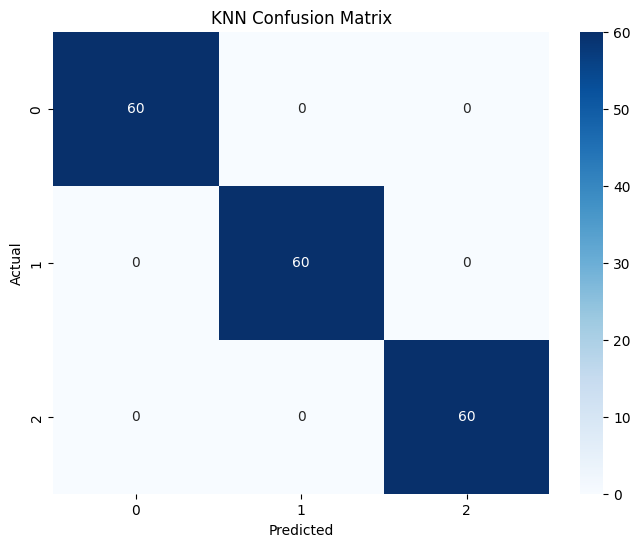

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


SVM Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


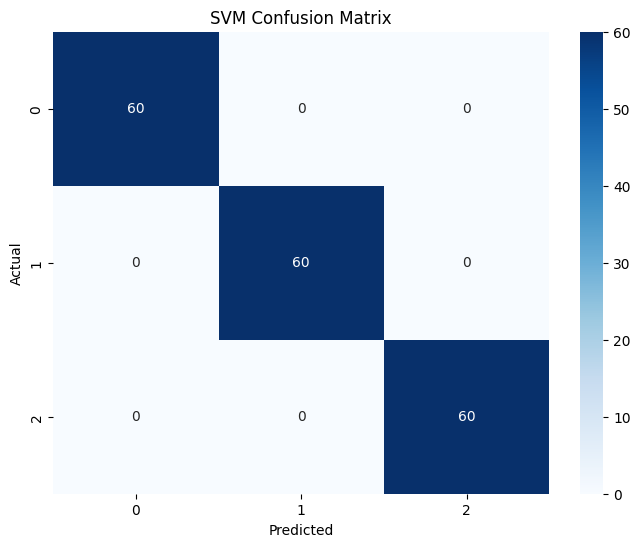

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


RF Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


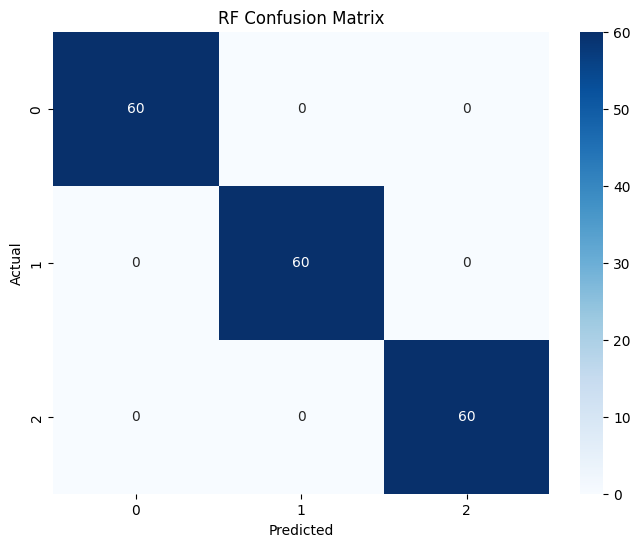

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


LR Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'el

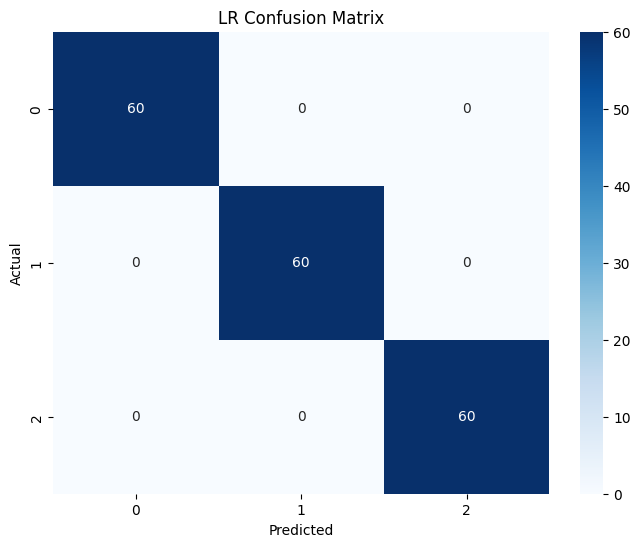

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


MLP Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


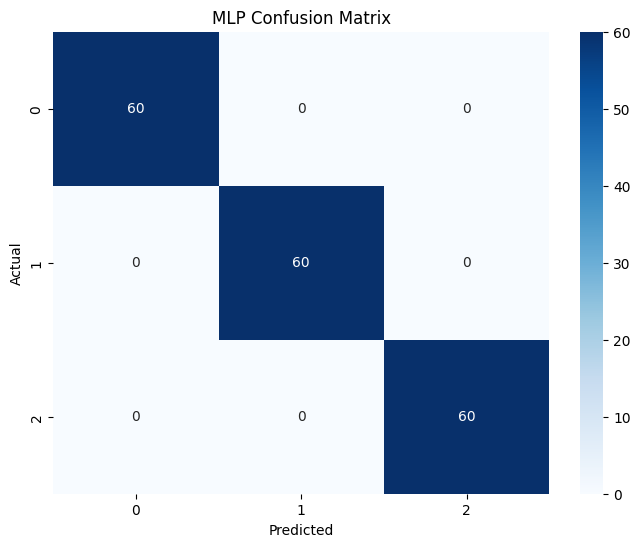

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

Results saved to ./results/results_without_product.json


In [9]:
# 1. Product Type classification without considering the storage conditions (no dimensionality reduction)

print('Storage Condition classification without considering Product Type')
results_without_product = classify_with_dimensionality_reduction(features_sc, target_sc, 
                                                              best_params_without_product, pca_components=False, lda_components=False)
save_results_to_file(results_without_product, 'results_without_product.json')





| **Storage Condition Classification considering the Product Type** |

Define best parameters for classification considering the Product Type

In [70]:
# Define best parameters for classification considering the Product Type
'''best_params_with_product = {  
    'KNN': {'n_neighbors': 12, 'weights': 'distance'},  
    'Random Forest': {'n_estimators': 145, 'min_samples_split': 2, 'max_depth': 10},  
    'SVM': {'C': 0.1, 'kernel': 'linear'},  
    'Logistic Regression': {'C': 0.01, 'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'max_iter': 1000}  
    
}

best_params_with_product = {
    'KNN': {'weights': 'uniform', 'p': 1, 'n_neighbors': 1},  # Best CV Accuracy = 0.9722
    'Random Forest': {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 35},  # Best CV Accuracy = 0.9722
    'SVM': {'C': 617.4825096277165, 'gamma': 'auto', 'kernel': 'rbf'},  # Best CV Accuracy = 0.9611
    'Logistic Regression': {'C': 609.9976577826209, 'l1_ratio': 0.8331949117361643, 'penalty': 'l2', 'solver': 'liblinear'},  # Best CV Accuracy = 0.9500
    'MLP': {'activation': 'relu', 'alpha': 0.015611864044243652, 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.0010097491581800289, 'max_iter': 2000}  # Best CV Accuracy = 0.9833
}'''

best_params_with_product = {
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  # Best CV Accuracy = 0.9722
    'Random Forest': {'n_estimators': 281, 'min_samples_split': 2, 'max_depth': 30},  # Best CV Accuracy = 0.9667
    'SVM': {'C': 70.80754970702675, 'kernel': 'rbf'},  # Best CV Accuracy = 0.9556
    'Logistic Regression': {'C': 37.454637344617396, 'solver': 'lbfgs'},  # Best CV Accuracy = 0.9556
    'MLP': {'activation': 'relu', 'alpha': 0.0066051592985279526, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}  # Best CV Accuracy = 0.9889
}
'''
best_params_with_product = {
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  # Best CV Accuracy = 0.9722
    'Random Forest': {'n_estimators': 87, 'min_samples_split': 2, 'max_depth': None},  # Best CV Accuracy = 0.9778
    'SVM': {'C': 70.80754970702675, 'kernel': 'rbf'},  # Best CV Accuracy = 0.9611
    'Logistic Regression': {'C': 727.2729958564208, 'l1_ratio': 0.3265407688058354, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001},  # Best CV Accuracy = 0.9667
    'MLP': {'activation': 'relu', 'alpha': 0.03217800649717359, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000}  # Best CV Accuracy = 0.9889
}'''



"\nbest_params_with_product = {\n    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  # Best CV Accuracy = 0.9722\n    'Random Forest': {'n_estimators': 87, 'min_samples_split': 2, 'max_depth': None},  # Best CV Accuracy = 0.9778\n    'SVM': {'C': 70.80754970702675, 'kernel': 'rbf'},  # Best CV Accuracy = 0.9611\n    'Logistic Regression': {'C': 727.2729958564208, 'l1_ratio': 0.3265407688058354, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001},  # Best CV Accuracy = 0.9667\n    'MLP': {'activation': 'relu', 'alpha': 0.03217800649717359, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000}  # Best CV Accuracy = 0.9889\n}"


Storage Condition classification parametres considering Product Type
Product Type classification with parameters considering dimensionality reduction (PCA: False, LDA: False)

KNN Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1.         1.         1.         0.88888889 1.         1.
 0.88888889 1.         1.         0.94444444]
Mean CV Accuracy: 0.9722222222222223


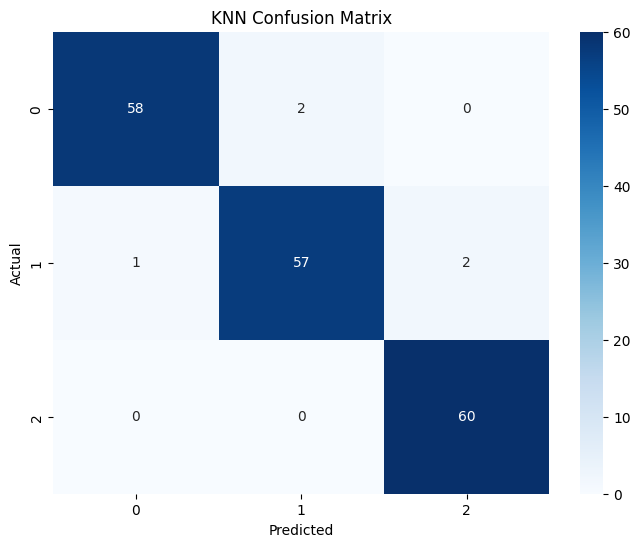

              precision    recall  f1-score   support

           1       0.98      0.97      0.97        60
           2       0.97      0.95      0.96        60
           3       0.97      1.00      0.98        60

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180


SVM Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1.         1.         0.94444444 0.94444444 1.         1.
 0.94444444 0.88888889 1.         0.88888889]
Mean CV Accuracy: 0.961111111111111


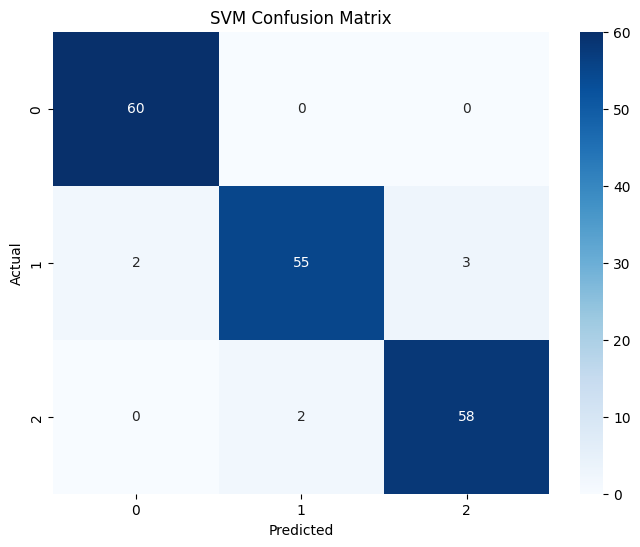

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        60
           2       0.96      0.92      0.94        60
           3       0.95      0.97      0.96        60

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180


RF Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 0.88888889 0.88888889 1.         0.88888889]
Mean CV Accuracy: 0.9666666666666668


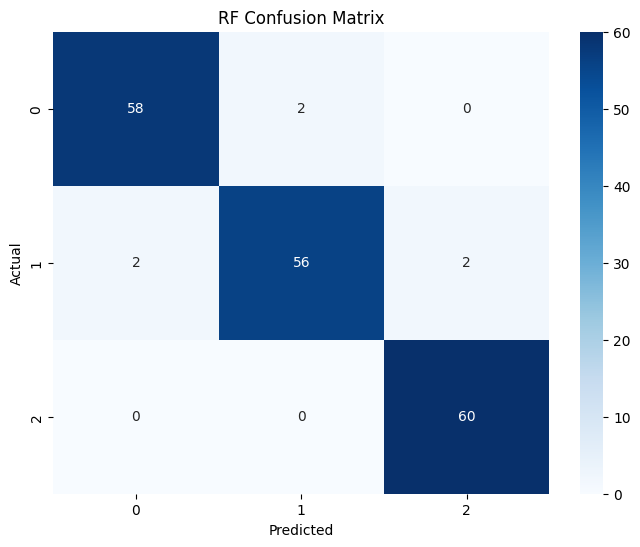

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        60
           2       0.97      0.93      0.95        60
           3       0.97      1.00      0.98        60

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180


LR Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1.         1.         1.         0.88888889 1.         1.
 1.         1.         0.94444444 0.83333333]
Mean CV Accuracy: 0.9666666666666668


/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

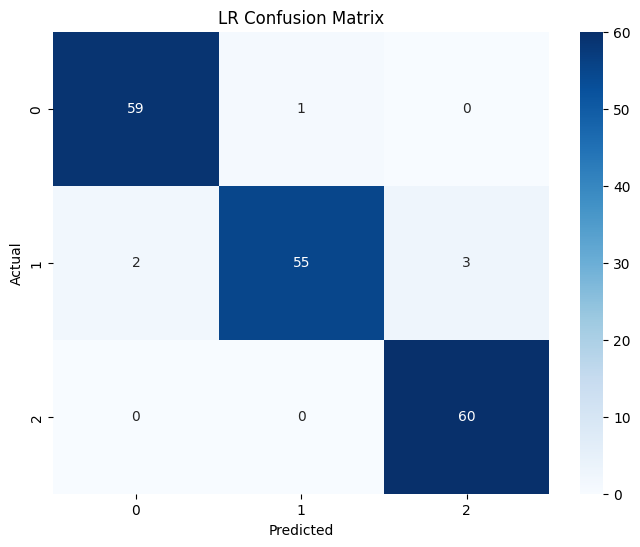

              precision    recall  f1-score   support

           1       0.97      0.98      0.98        60
           2       0.98      0.92      0.95        60
           3       0.95      1.00      0.98        60

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180


MLP Classification Results (LDA Components: None, PCA Components: None):
Cross-Validation Scores: [1.         1.         1.         0.94444444 1.         1.
 1.         1.         1.         0.83333333]
Mean CV Accuracy: 0.9777777777777779


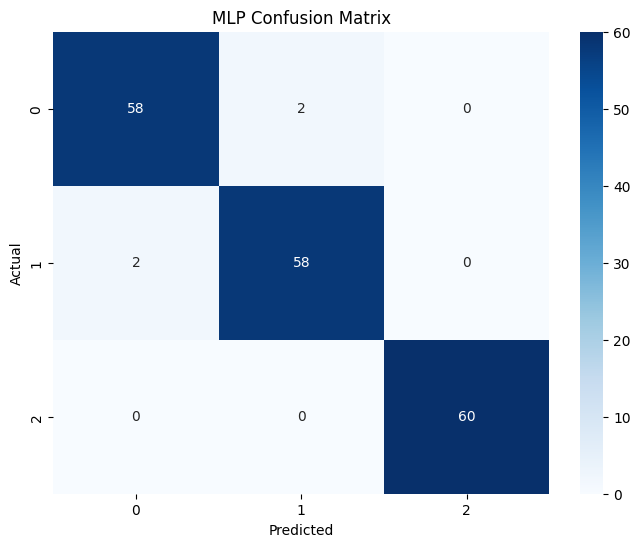

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        60
           2       0.97      0.97      0.97        60
           3       1.00      1.00      1.00        60

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

Results saved to ./results/results_with_product.json


In [71]:
# 2. Storage condition classification considering Product Type  (no dimensionality reduction)

print('\nStorage Condition classification parametres considering Product Type')
results_with_product = classify_with_dimensionality_reduction(features_sc_pt, target_sc, best_params_with_product, pca_components=False, lda_components=False)

save_results_to_file(results_with_product, 'results_with_product.json')

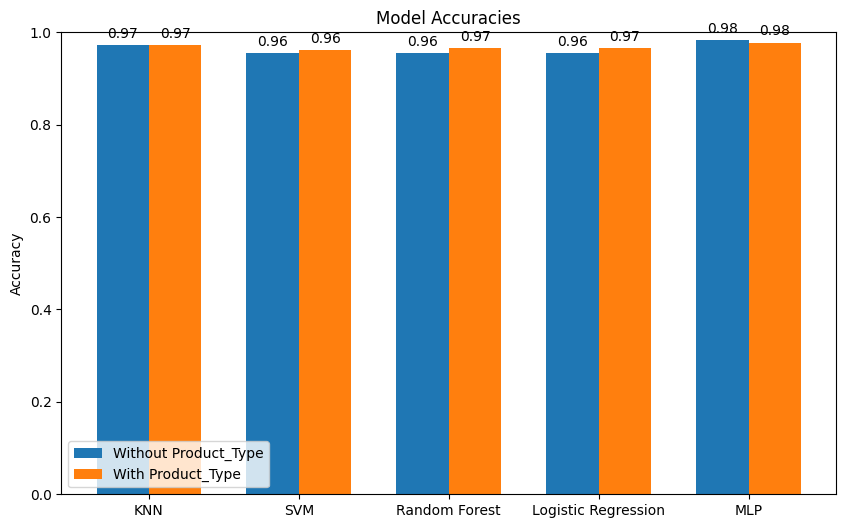

In [73]:
# Plotting the accuracy comparisons  
plot_accuracy_comparisons(results_without_product, results_with_product)

# Storage Condition Classification with dimensionaliy reduction

#     1. Classification Using LDA Features

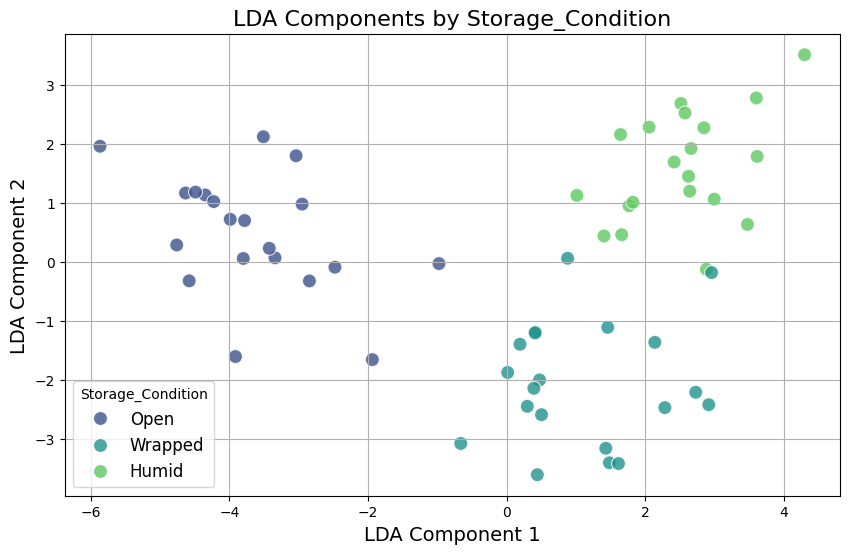

# *Classification without considering Product Type*

*Prepare the data*

In [20]:
# Prepare Data  
target_sc = all_data[['storage_1', 'storage_2', 'storage_3']].idxmax(axis=1).str[-1].astype(int)
features_sc = all_data.iloc[:, 5:] 
features_sc_pt = all_data.drop(columns=['Replica', 'storage_1', 'storage_2', 'storage_3'])

**Define best parameters for classification without Product types(LDA)**

In [21]:
# Define best parameters for classification without Product type  
best_params_without_product_lda = {  
    'KNN': {'n_neighbors': 5, 'weights': 'uniform'},  
    'Random Forest': {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None},  
    'SVM': {'C': 0.1, 'kernel': 'linear'},  
    'Logistic Regression': {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1000}  
}  

storage conditions classification without considering the Product Type
Product Type classification with parameters considering dimensionality reduction (PCA: False, LDA: True)

KNN Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.61111111 0.66666667 0.63888889 0.72222222 0.72222222]
Mean CV Accuracy: 0.6722222222222223


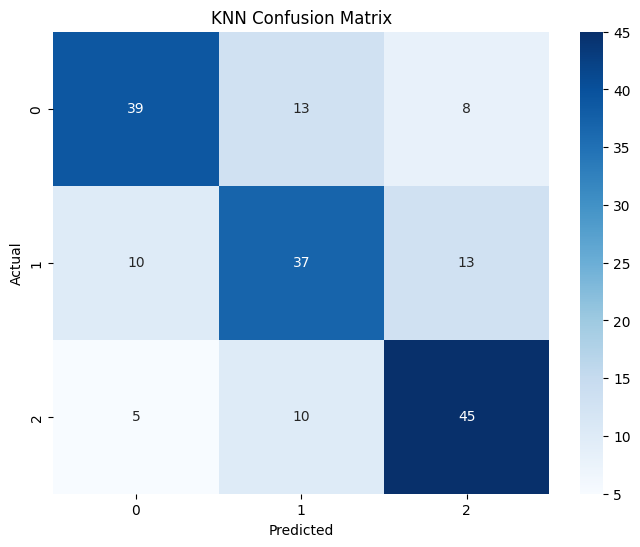

              precision    recall  f1-score   support

           1       0.72      0.65      0.68        60
           2       0.62      0.62      0.62        60
           3       0.68      0.75      0.71        60

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180


SVM Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.61111111 0.69444444 0.63888889 0.72222222 0.72222222]
Mean CV Accuracy: 0.6777777777777778


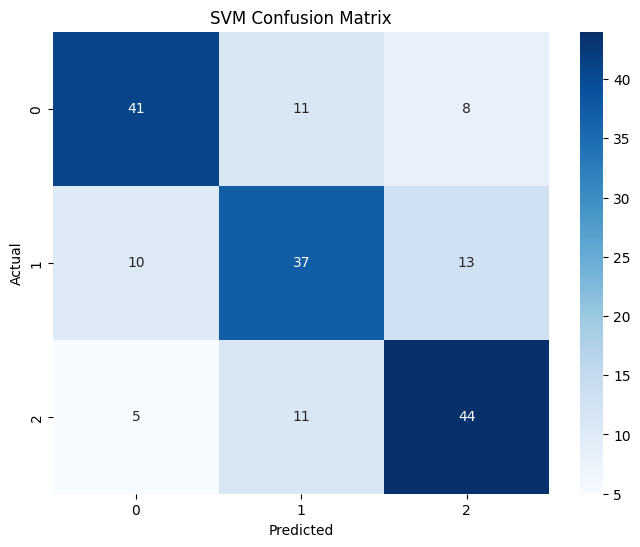

              precision    recall  f1-score   support

           1       0.73      0.68      0.71        60
           2       0.63      0.62      0.62        60
           3       0.68      0.73      0.70        60

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.68      0.68      0.68       180


RF Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.61111111 0.63888889 0.63888889 0.75       0.66666667]
Mean CV Accuracy: 0.6611111111111111


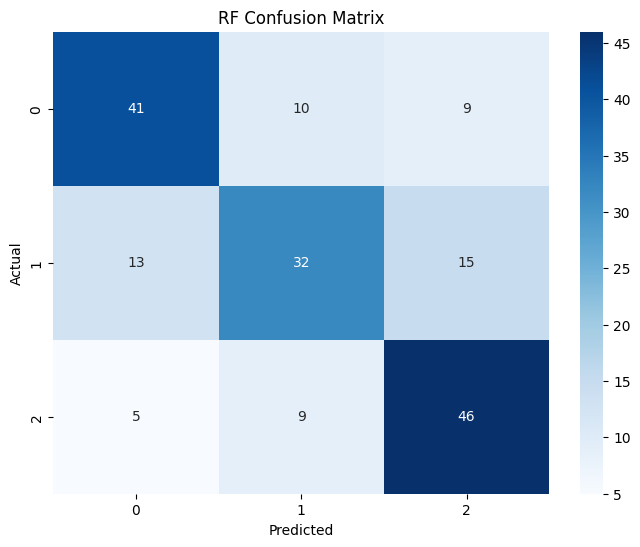

              precision    recall  f1-score   support

           1       0.69      0.68      0.69        60
           2       0.63      0.53      0.58        60
           3       0.66      0.77      0.71        60

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.66      0.66      0.66       180


LR Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.61111111 0.69444444 0.63888889 0.75       0.72222222]
Mean CV Accuracy: 0.6833333333333333


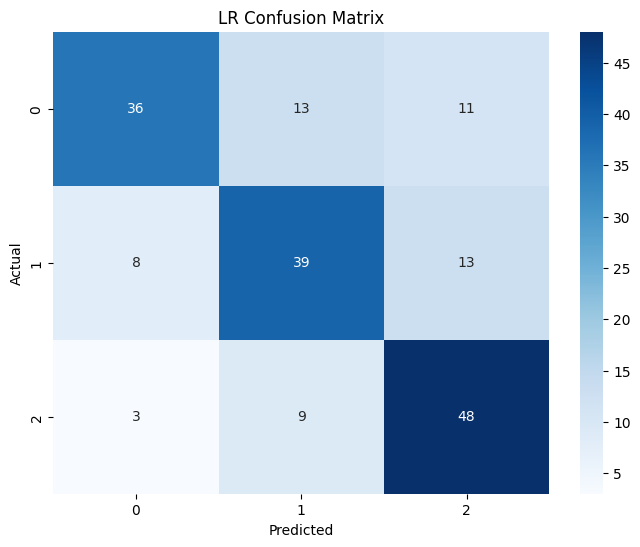

              precision    recall  f1-score   support

           1       0.77      0.60      0.67        60
           2       0.64      0.65      0.64        60
           3       0.67      0.80      0.73        60

    accuracy                           0.68       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.69      0.68      0.68       180


MLP Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.63888889 0.66666667 0.63888889 0.75       0.72222222]
Mean CV Accuracy: 0.6833333333333333


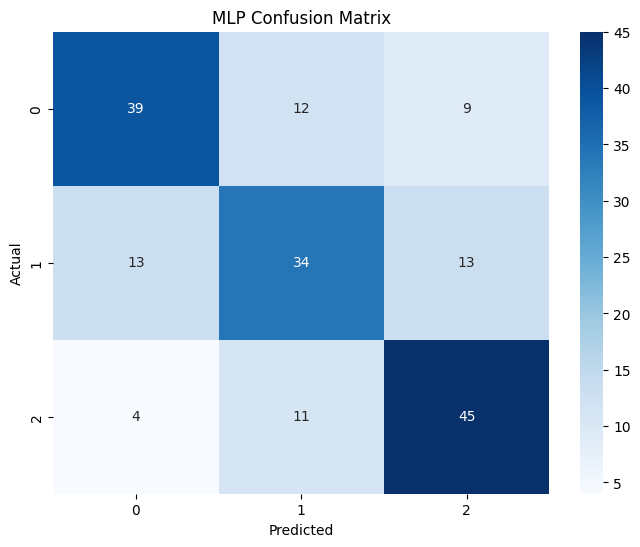

              precision    recall  f1-score   support

           1       0.70      0.65      0.67        60
           2       0.60      0.57      0.58        60
           3       0.67      0.75      0.71        60

    accuracy                           0.66       180
   macro avg       0.65      0.66      0.65       180
weighted avg       0.65      0.66      0.65       180

Results saved to ./results/results_without_product_lda.json


In [22]:
 # 1. Storage conditions classification without considering the Product Type(LDA)

print('storage conditions classification without considering the Product Type')
results_without_product_lda = classify_with_dimensionality_reduction(
    features_sc, target_sc, best_params_without_product_lda, pca_components=False, lda_components=True)

save_results_to_file(results_without_product_lda, 'results_without_product_lda.json')

**Define best parameters for classification considering the Product Types(LDA)**

In [23]:
# Define best parameters for classification considering the storage conditions  
best_params_with_product_lda = {  
    'KNN': {'n_neighbors': 12, 'weights': 'distance'},  
    'Random Forest': {'n_estimators': 145, 'min_samples_split': 2, 'max_depth': 10},  
    'SVM': {'C': 0.1, 'kernel': 'linear'},  
    'Logistic Regression': {'C': 0.01, 'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'max_iter': 1000}  
}

storage conditions classification with considering the Product Types
Product Type classification with parameters considering dimensionality reduction (PCA: False, LDA: True)

KNN Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.66666667 0.66666667 0.5        0.72222222 0.72222222]
Mean CV Accuracy: 0.6555555555555556


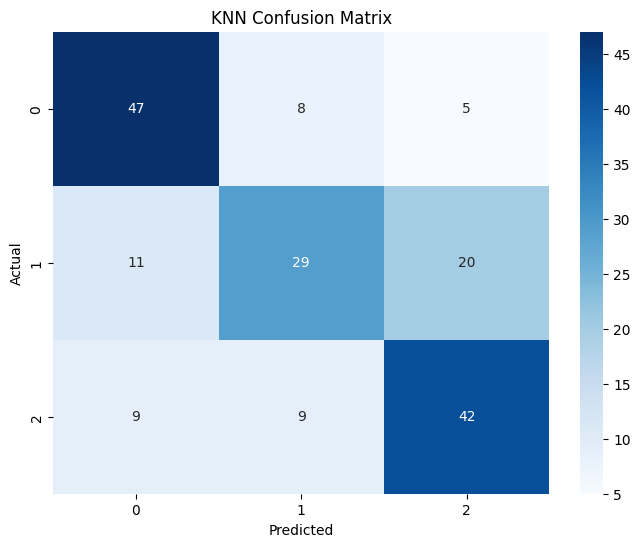

              precision    recall  f1-score   support

           1       0.70      0.78      0.74        60
           2       0.63      0.48      0.55        60
           3       0.63      0.70      0.66        60

    accuracy                           0.66       180
   macro avg       0.65      0.66      0.65       180
weighted avg       0.65      0.66      0.65       180


SVM Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.66666667 0.66666667 0.5        0.72222222 0.72222222]
Mean CV Accuracy: 0.6555555555555556


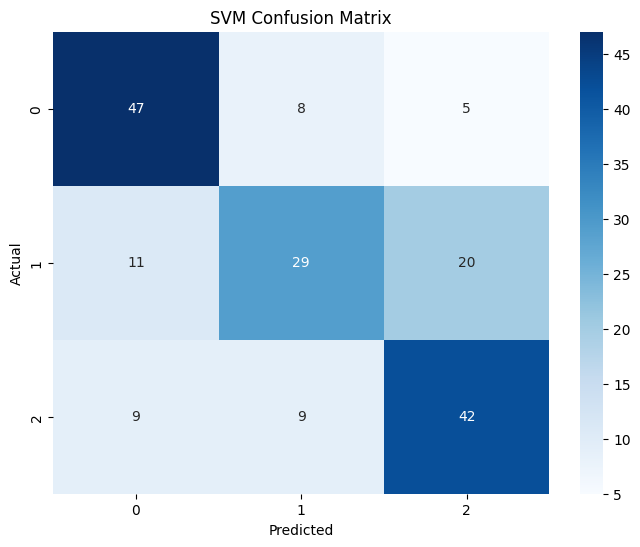

              precision    recall  f1-score   support

           1       0.70      0.78      0.74        60
           2       0.63      0.48      0.55        60
           3       0.63      0.70      0.66        60

    accuracy                           0.66       180
   macro avg       0.65      0.66      0.65       180
weighted avg       0.65      0.66      0.65       180


RF Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.61111111 0.66666667 0.5        0.75       0.69444444]
Mean CV Accuracy: 0.6444444444444445


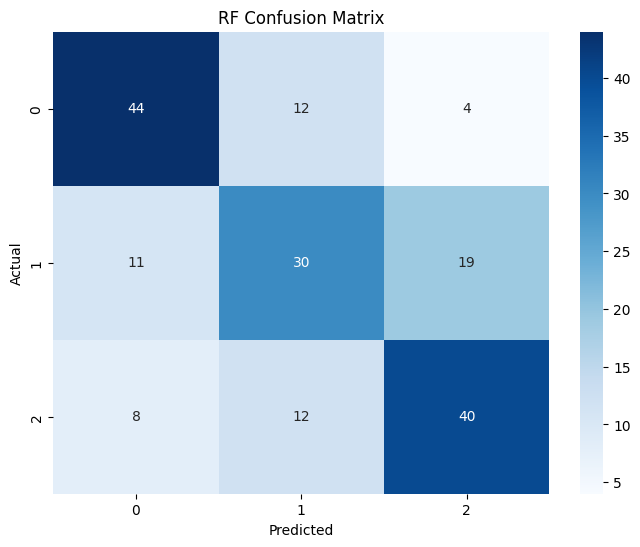

              precision    recall  f1-score   support

           1       0.70      0.73      0.72        60
           2       0.56      0.50      0.53        60
           3       0.63      0.67      0.65        60

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.63      0.63      0.63       180


LR Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.66666667 0.63888889 0.52777778 0.72222222 0.72222222]
Mean CV Accuracy: 0.6555555555555556


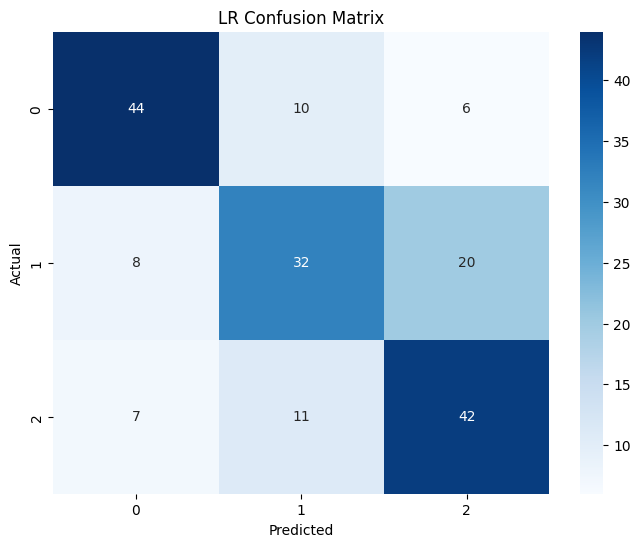

              precision    recall  f1-score   support

           1       0.75      0.73      0.74        60
           2       0.60      0.53      0.57        60
           3       0.62      0.70      0.66        60

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.65       180
weighted avg       0.66      0.66      0.65       180


MLP Classification Results (LDA Components: True, PCA Components: None):
Cross-Validation Scores: [0.63888889 0.61111111 0.52777778 0.72222222 0.72222222]
Mean CV Accuracy: 0.6444444444444445


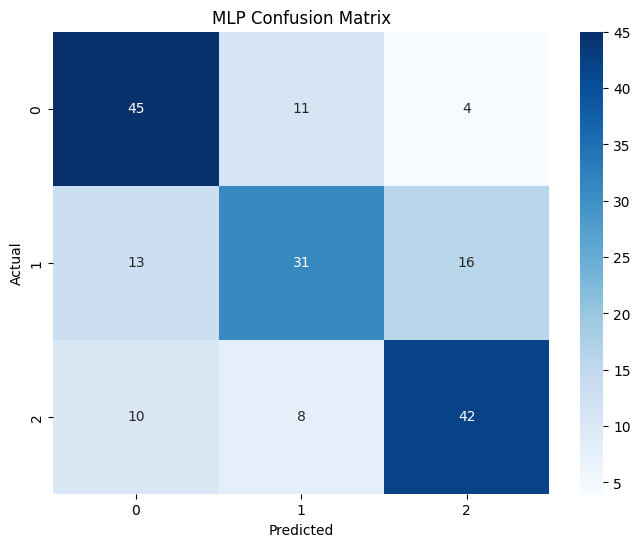

              precision    recall  f1-score   support

           1       0.66      0.75      0.70        60
           2       0.62      0.52      0.56        60
           3       0.68      0.70      0.69        60

    accuracy                           0.66       180
   macro avg       0.65      0.66      0.65       180
weighted avg       0.65      0.66      0.65       180

Results saved to ./results/results_with_product_lda.json


In [24]:
 # 2.storage conditions classification considering the Product Type (LDA)

print('storage conditions classification with considering the Product Types')
results_with_product_lda = classify_with_dimensionality_reduction(
    features_sc_pt, target_sc, best_params_with_product_lda, pca_components=False, lda_components=True)

save_results_to_file(results_with_product_lda, 'results_with_product_lda.json')

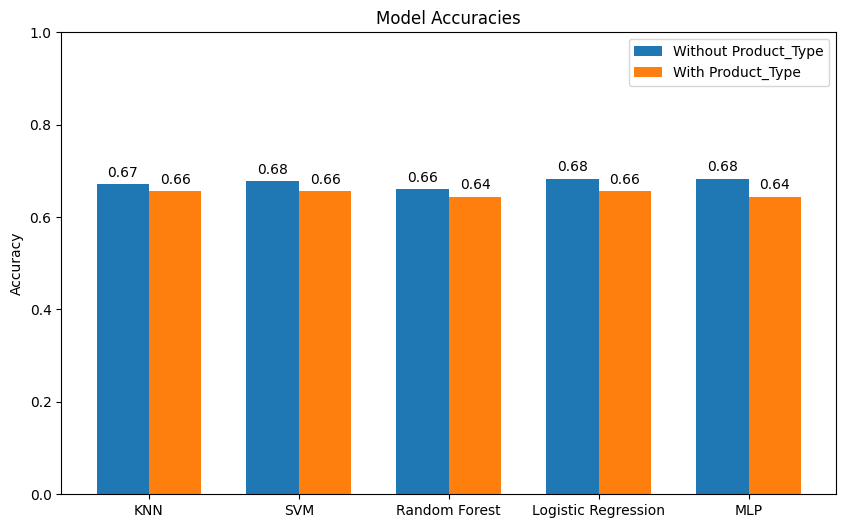

In [25]:
# Plotting the accuracy comparisons  
plot_accuracy_comparisons(results_without_product_lda, results_with_product_lda)

In [ ]:
project introduction
dataset ovierview
target lAbels
data preprocessing
    removed useless component 
applied dimensionaliy reduction
models
xgboost   grid search and  
models comparision
    


#      2. Classification of storage conditions Using PCA Features

 **Storage condition without considering the Product Types** 

In [159]:
# Prepare Data  
target_sc = all_data[['storage_1', 'storage_2', 'storage_3']].idxmax(axis=1).str[-1].astype(int)
features_sc = all_data.iloc[:, 5:] 
features_sc_pt = all_data.drop(columns=['Replica', 'storage_1', 'storage_2', 'storage_3'])

**Define best parameters for classification without Product Types(PCA)**

In [160]:
# Define best parameters for classification without storage conditions  
best_params_without_product_pca = {  
    'KNN': {'n_neighbors': 1, 'weights': 'uniform'},  
    'Random Forest': {'n_estimators': 160, 'min_samples_split': 15, 'max_depth': None},  
    'SVM': {'C': 5.809303133207778, 'kernel': 'rbf'},  
    'Logistic Regression': {'C': 37.454637344617396, 'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'relu', 'alpha': 0.09621720243493492, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000}  
}  

Product Type classification without considering the storage conditions
Product Type classification with parameters considering dimensionality reduction (PCA: 0.97, LDA: False)

KNN Classification Results (LDA Components: None, PCA Components: 0.97):
Cross-Validation Scores: [0.83333333 0.66666667 0.83333333 0.66666667 1.         0.5
 0.66666667 0.66666667 0.66666667 0.66666667]
Mean CV Accuracy: 0.7166666666666667


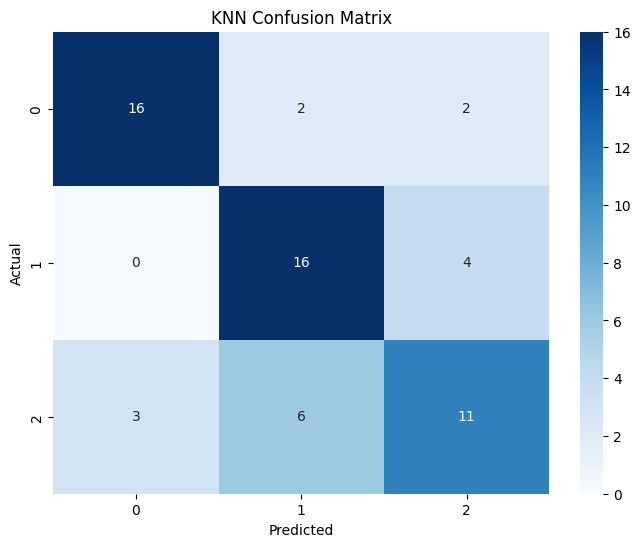

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.67      0.80      0.73        20
           3       0.65      0.55      0.59        20

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60


SVM Classification Results (LDA Components: None, PCA Components: 0.97):
Cross-Validation Scores: [0.33333333 0.66666667 0.5        0.5        0.66666667 0.33333333
 0.16666667 0.66666667 0.33333333 0.5       ]
Mean CV Accuracy: 0.4666666666666666


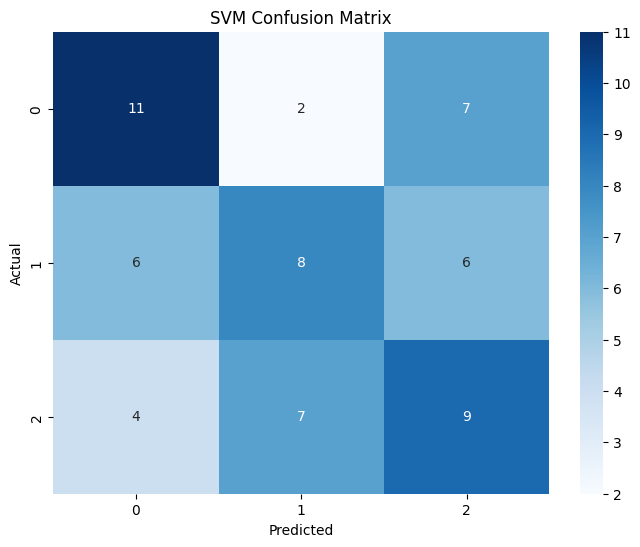

              precision    recall  f1-score   support

           1       0.52      0.55      0.54        20
           2       0.47      0.40      0.43        20
           3       0.41      0.45      0.43        20

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.47      0.47      0.47        60


RF Classification Results (LDA Components: None, PCA Components: 0.97):
Cross-Validation Scores: [0.5        0.66666667 0.66666667 0.66666667 1.         0.5
 0.33333333 0.66666667 0.66666667 0.66666667]
Mean CV Accuracy: 0.6333333333333334


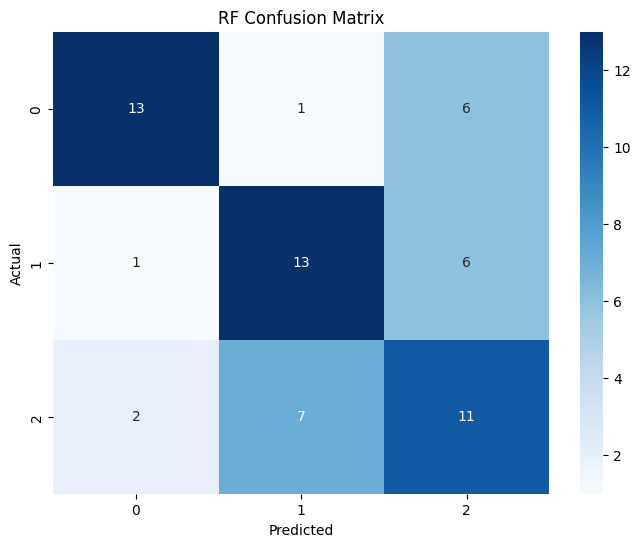

              precision    recall  f1-score   support

           1       0.81      0.65      0.72        20
           2       0.62      0.65      0.63        20
           3       0.48      0.55      0.51        20

    accuracy                           0.62        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.62      0.62        60


LR Classification Results (LDA Components: None, PCA Components: 0.97):
Cross-Validation Scores: [0.33333333 0.33333333 0.66666667 0.5        0.5        0.33333333
 0.33333333 0.66666667 0.5        0.33333333]
Mean CV Accuracy: 0.4499999999999999


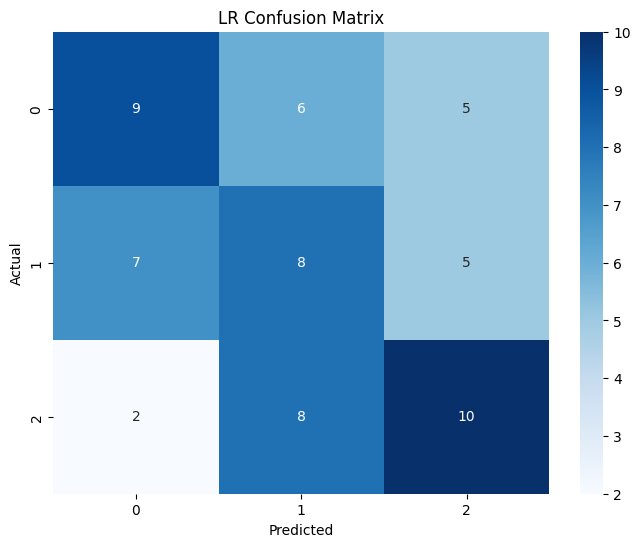

              precision    recall  f1-score   support

           1       0.50      0.45      0.47        20
           2       0.36      0.40      0.38        20
           3       0.50      0.50      0.50        20

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45        60



/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Classification Results (LDA Components: None, PCA Components: 0.97):
Cross-Validation Scores: [0.33333333 0.5        0.5        0.66666667 0.83333333 0.5
 0.5        0.66666667 0.66666667 0.66666667]
Mean CV Accuracy: 0.5833333333333334


/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/miniconda3/envs/project39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


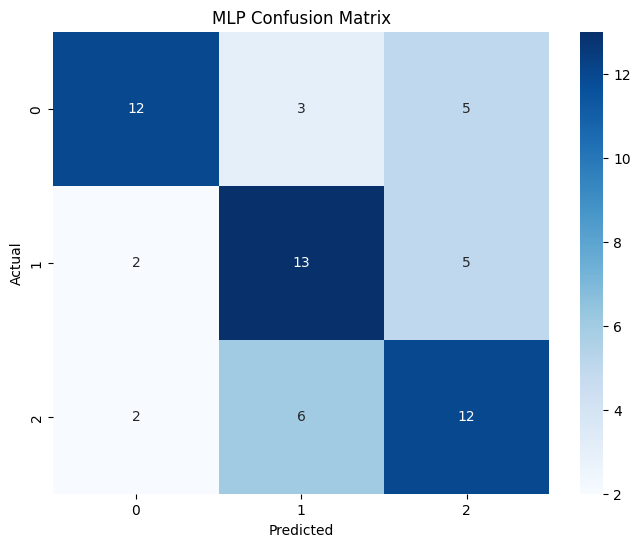

              precision    recall  f1-score   support

           1       0.75      0.60      0.67        20
           2       0.59      0.65      0.62        20
           3       0.55      0.60      0.57        20

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.62        60
weighted avg       0.63      0.62      0.62        60



In [167]:
 # 1.Product Type classification without considering the storage conditions (LDA)
pca_component = 0.97
print('Product Type classification without considering the storage conditions')
results_without_product_pca = classify_with_dimensionality_reduction(
    features_sc, target_sc, best_params_without_product_pca, pca_components=pca_component, lda_components=False)

**Define best parameters for classification considering the Product Types(PCA)**

In [138]:
# Define best parameters for classification considering the product type
best_params_with_product_pca = {  
    'KNN': {'n_neighbors': 3, 'weights': 'uniform'},  
    'Random Forest': {'n_estimators': 100, 'min_samples_split': 15, 'max_depth': 5},  
    'SVM': {'C': 0.1, 'kernel': 'linear'},  
    'Logistic Regression': {'C': 1.0,'solver': 'lbfgs', 'max_iter': 1000},  
    'MLP': {'activation': 'logistic', 'alpha': 0.0797542986860233, 'hidden_layer_sizes': (150,), 'max_iter': 1000}  
}

Storage Condition classification considering the product type
Product Type classification with parameters considering dimensionality reduction (PCA: 20, LDA: False)

KNN Classification Results (LDA Components: None, PCA Components: 20):
Cross-Validation Scores: [0.5        0.83333333 0.5        0.66666667 1.         0.5
 0.33333333 0.5        0.5        0.5       ]
Mean CV Accuracy: 0.5833333333333333


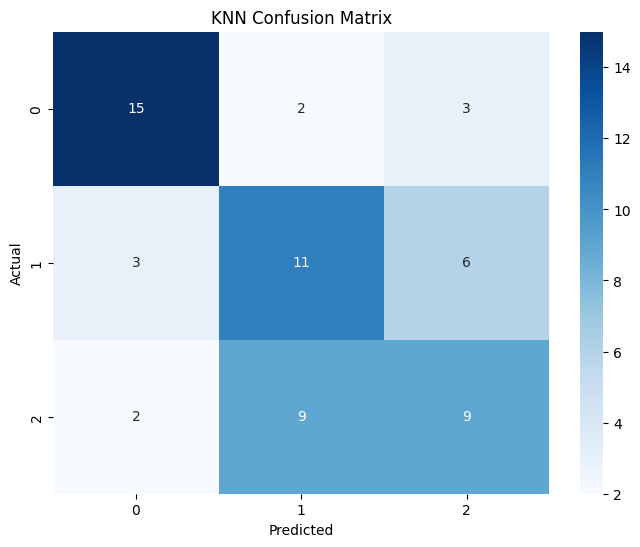

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        20
           2       0.50      0.55      0.52        20
           3       0.50      0.45      0.47        20

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60


SVM Classification Results (LDA Components: None, PCA Components: 20):
Cross-Validation Scores: [0.66666667 0.5        0.66666667 0.66666667 0.66666667 0.33333333
 0.16666667 0.83333333 0.83333333 0.66666667]
Mean CV Accuracy: 0.6


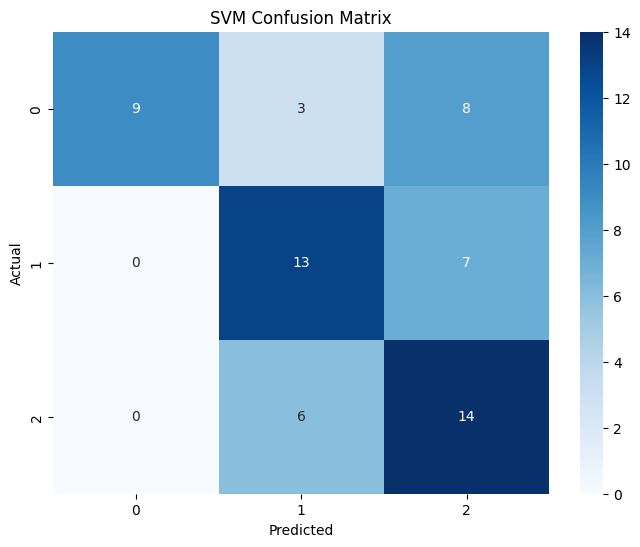

              precision    recall  f1-score   support

           1       1.00      0.45      0.62        20
           2       0.59      0.65      0.62        20
           3       0.48      0.70      0.57        20

    accuracy                           0.60        60
   macro avg       0.69      0.60      0.60        60
weighted avg       0.69      0.60      0.60        60


RF Classification Results (LDA Components: None, PCA Components: 20):
Cross-Validation Scores: [0.66666667 0.66666667 1.         1.         0.66666667 0.83333333
 0.33333333 0.66666667 0.83333333 1.        ]
Mean CV Accuracy: 0.7666666666666666


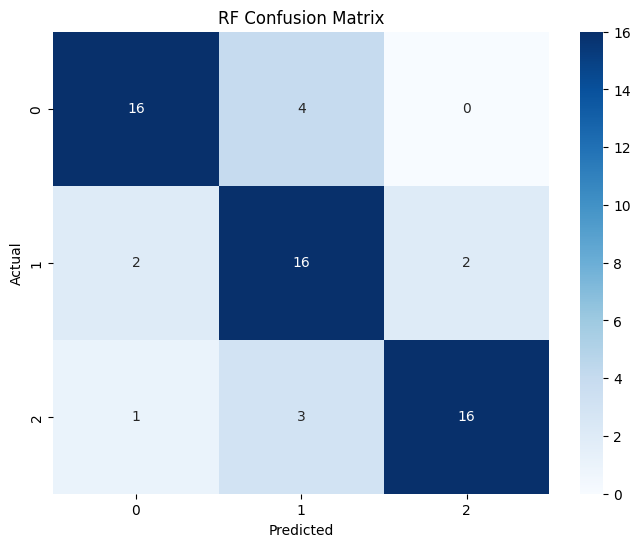

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.70      0.80      0.74        20
           3       0.89      0.80      0.84        20

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60


LR Classification Results (LDA Components: None, PCA Components: 20):
Cross-Validation Scores: [0.66666667 0.66666667 0.83333333 1.         1.         0.83333333
 0.5        1.         0.66666667 0.83333333]
Mean CV Accuracy: 0.8


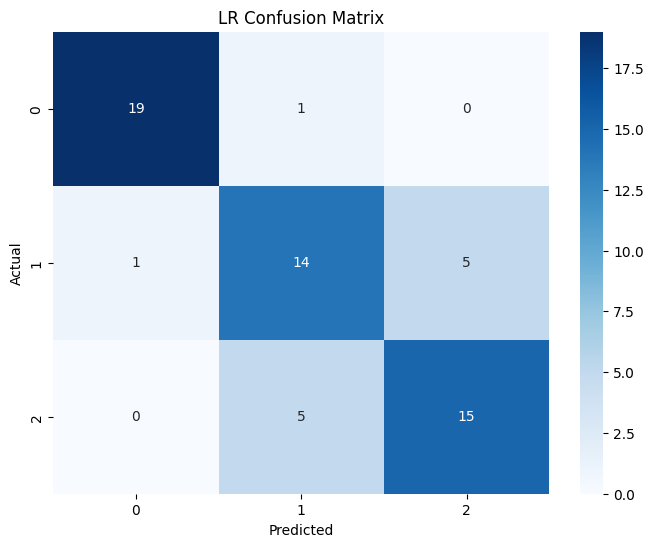

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.70      0.70      0.70        20
           3       0.75      0.75      0.75        20

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


MLP Classification Results (LDA Components: None, PCA Components: 20):
Cross-Validation Scores: [0.83333333 0.66666667 1.         1.         1.         0.83333333
 0.5        1.         0.66666667 1.        ]
Mean CV Accuracy: 0.85


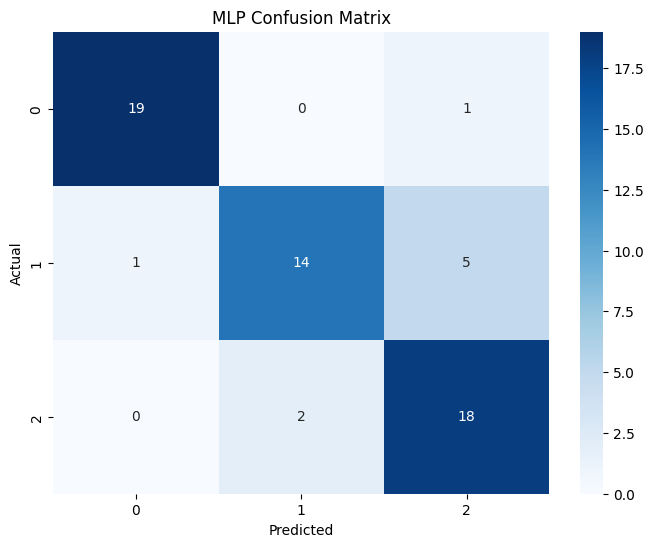

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.88      0.70      0.78        20
           3       0.75      0.90      0.82        20

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [139]:
 # 2. Storage condition classification considering the product type(pcA)

print('Storage Condition classification considering the product type')
results_with_product_pca = classify_with_dimensionality_reduction(
    features_sc_pt, target_sc, best_params_with_product_pca, pca_components=pca_component, lda_components=False)

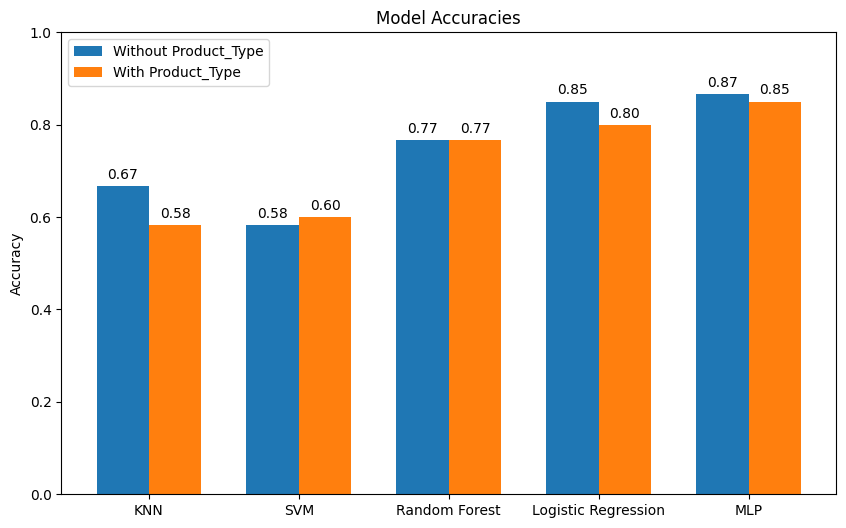

In [140]:
# Plotting the accuracy comparisons  
plot_accuracy_comparisons(results_without_product_pca, results_with_product_pca)

In [ ]:
# Collect accuracy results for each model (without storage and no dimension reduction)
results_without_storage['KNN'] = knn(features_pt, target, best_params_without_storage['KNN'], pca_components=None, lda_components=False, return_accuracy=True)  
results_without_storage['SVM'] = svm(features_pt, target, best_params_without_storage['SVM'], pca_components=None, lda_components=False, return_accuracy=True)  
results_without_storage['Random Forest'] = rf(features_pt, target, best_params_without_storage['Random Forest'], pca_components=None, lda_components=False, return_accuracy=True)  
results_without_storage['Logistic Regression'] = lr(features_pt, target, best_params_without_storage['Logistic Regression'], pca_components=None, lda_components=False, return_accuracy=True)  
results_without_storage['ANN'] = mlp(features_pt, target, best_params_without_storage['ANN'], pca_components=None, lda_components=False, return_accuracy=True)  

# 2. Product Type classification considering the storage conditions with dimensionality reduction (either LDA or PCA)
print('\nProduct Type classification with parameters considering the storage conditions')

features_pt_sc = all_data.iloc[:, 2:]  # Select features including storage conditions

# Here, we perform the classification considering storage and dimensionality reduction with options for LDA or PCA
# Example for PCA with 2 components and LDA enabled
results_with_storage['PCA_2'] = classify_with_dimensionality_reduction(features_pt_sc, target, best_params_with_storage, pca_components=2, lda_components=False)
results_with_storage['LDA'] = classify_with_dimensionality_reduction(features_pt_sc, target, best_params_with_storage, pca_components=None, lda_components=True)

# Collect accuracy results for each model (with storage and no dimension reduction)
results_with_storage['KNN'] = knn(features_pt_sc, target, best_params_with_storage['KNN'], pca_components=None, lda_components=False, return_accuracy=True)  
results_with_storage['SVM'] = svm(features_pt_sc, target, best_params_with_storage['SVM'], pca_components=None, lda_components=False, return_accuracy=True)  
results_with_storage['Random Forest'] = rf(features_pt_sc, target, best_params_with_storage['Random Forest'], pca_components=None, lda_components=False, return_accuracy=True)  
results_with_storage['Logistic Regression'] = lr(features_pt_sc, target, best_params_with_storage['Logistic Regression'], pca_components=None, lda_components=False, return_accuracy=True)  
results_with_storage['ANN'] = mlp(features_pt_sc, target, best_params_with_storage['ANN'], pca_components=None, lda_components=False, return_accuracy=True)

# You can continue adding more options for PCA with different component counts if needed